# Girl Scouts Cookie Booth Locations

## Background

Girl Scouts is a pre-eminent leadership development organization for girls. And with programs from coast to coast and across the globe, Girl Scouts offers every girl a chance to practice a lifetime of leadership, adventure, and success.<br>When you buy Girl Scout Cookies, you feed joy and make a difference with every box. The scout may help the local hospital or animal shelter across town, climb her first mountain or start a nonprofit. It’s up to her and her troop. Proceeds stay local to power life-changing programs, experiences, and learning all year long!

Every year the girls have gone door-to-door to realize their individual and troop goals and contribute with confidence toward their community and troop. As you can gather the sale of girl scouts’ cookies are important business and something that each girl scout looks forward to every year.  

With COVID-19, door-to-door sales have become next-to-impossible.  

On request from my very own fifth grader, a proud girl scout trooper, is a request to find the next possible solution.  

Cookie booth sales at the local neighborhood would be an excellent solution to help my daughter's troop and the other troops in town to achieve their goals.  


**The problem is to find the top 10 prospective locations to set up cookie booths in our town, Grasmere, Staten Island, NY and one or two neighboring towns within a 3-mile radius to maximize sales.  And, to make the Girl Scouts troop a happier lot in the process.**


## Importing necessary libraries

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner

import json # library to handle JSON files
import requests

!pip install geopy #install if not already done
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

! pip install folium==0.5.0 #install if not already done
import folium # plotting library

# import k-means from clustering stage
from sklearn.cluster import KMeans

# Matplotlib and associated plotting modules
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
mpl.style.use('ggplot')

print('Folium installed')
print('\nLibraries imported.')

Folium installed

Libraries imported.


## Foursquare credentials

In [2]:
#setting the credentials for Foursquare API
# @hidden
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
ACCESS_TOKEN = 'xxx' # your FourSquare Access Token

In [3]:
#parameters for Foursquare API
VERSION = '20180604'
LIMIT = 50

## Data Collection and Cleaning

### Download NYC geospatial data

In [4]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [5]:
#extract contents
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

#extracting list of boroughs & neighborhoods
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods_df = pd.DataFrame(columns=column_names)

for data in neighborhoods_data:
    borough = data['properties']['borough'] 
    #neighborhood_name = 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods_df = neighborhoods_df.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)
    
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
    len(neighborhoods_df['Borough'].unique()),
    neighborhoods_df.shape[0]
)
)

neighborhoods_df.head()

The dataframe has 5 boroughs and 306 neighborhoods.


,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


### Map of New York city

In [6]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [7]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods_df['Latitude'], 
                                           neighborhoods_df['Longitude'], 
                                           neighborhoods_df['Borough'], 
                                           neighborhoods_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

In [8]:
#Unique Neighborhoods in NYC
neighborhoods_df['Borough'].unique()

array(['Bronx', 'Manhattan', 'Brooklyn', 'Queens', 'Staten Island'],
      dtype=object)

### Filtering on Staten Island borough

In [9]:
staten_df = neighborhoods_df[neighborhoods_df['Borough'] == 'Staten Island'].reset_index(drop=True)
staten_df.head()

,Borough,Neighborhood,Latitude,Longitude
0,Staten Island,St. George,40.644982,-74.079353
1,Staten Island,New Brighton,40.640615,-74.087017
2,Staten Island,Stapleton,40.626928,-74.077902
3,Staten Island,Rosebank,40.615305,-74.069805
4,Staten Island,West Brighton,40.631879,-74.107182


### Map of Staten Island

In [10]:
address = 'Staten Island, NY'

geolocator = Nominatim(user_agent="statenisland_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.5834557, -74.1496048.


In [11]:
# create map of Staten Island using latitude and longitude values
map_staten = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, borough, neighborhood in zip(staten_df['Latitude'], staten_df['Longitude'], staten_df['Borough'], staten_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_staten)  
    
map_staten

In [12]:
# Method to call Foursquare API to extract venues for each neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=500, print_name = False):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        
        if print_name:
            print('Searching neighborhood of {}'.format(name))
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/search?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()
        
        # assign relevant part of JSON to venues
        venues_data = results['response']['venues']        
        
        # tranform venues into a dataframe
        venues = pd.json_normalize(venues_data)        
        
        # keep only columns that include venue name, and anything that is associated with location
        filtered_columns = ['name','categories', 'location.formattedAddress', 'location.lat', 'location.lng']
        venues_filtered = venues.loc[:, filtered_columns]
        # function that extracts the category of the venue
        def get_category_type(row):
            try:
                categories_list = row['categories']
            except:
                categories_list = row['venue.categories']

            if len(categories_list) == 0:
                return None
            else:
                return categories_list[0]['name']

        # filter the category for each row
        venues_filtered['categories'] = venues_filtered.apply(get_category_type, axis=1)
        # clean column names 
        venues_filtered.columns = ['name','categories', 'Address', 'Venue Latitude', 'Venue Longitude']
        venues_filtered['Address'] = venues_filtered['Address'].map(lambda x: x[0])
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v[1][0], 
            v[1][1], 
            v[1][2],
            v[1][3],
            v[1][4]) for v in venues_filtered.iterrows()])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Category', 
                  'Venue Address',
                  'Venue Latitude', 
                  'Venue Longitude']
    
    return(nearby_venues)

In [13]:
#Using the Foursquare API to extract all the venues of Staten Island
all_staten_venues = getNearbyVenues(staten_df["Neighborhood"], 
                                   staten_df['Latitude'], 
                                   staten_df['Longitude'], 
                                   radius=500)

### Neighborhoods of interest

In [14]:
#Filter on towns of interest in a 3 mile radius
towns_of_interest = ['Arrochar','Grasmere', 'Shore Acres', 'Stapleton', 'Concord', 
                     'Old Town', 'Park Hill', 'South Beach']
target_towns_df = staten_df.loc[staten_df['Neighborhood'].isin(towns_of_interest), :]

print('The neighborhoods of interest are {} neighborhoods.\n'.format(len(target_towns_df['Neighborhood'].unique())))
target_towns_df.head(8)

The neighborhoods of interest are 8 neighborhoods.



,Borough,Neighborhood,Latitude,Longitude
2,Staten Island,Stapleton,40.626928,-74.077902
7,Staten Island,South Beach,40.580247,-74.079553
24,Staten Island,Park Hill,40.609190,-74.080157
28,Staten Island,Arrochar,40.596313,-74.067124
29,Staten Island,Grasmere,40.598268,-74.076674
30,Staten Island,Old Town,40.596329,-74.087511
48,Staten Island,Shore Acres,40.609719,-74.066678
50,Staten Island,Concord,40.604473,-74.084024


### Map of my town, Grasmere, Staten Island, NY

In [15]:
address = 'Grasmere, Staten Island, NY'

geolocator = Nominatim(user_agent="grasmere_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Staten Island are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Staten Island are 40.6042711, -74.087086.


In [16]:
# create map of Grasmere, Staten Island using latitude and longitude values
map_grasmere = folium.Map(location=[latitude, longitude], zoom_start=13)

# add markers to map
for lat, lng, borough, neighborhood in zip(target_towns_df['Latitude'], 
                                           target_towns_df['Longitude'], 
                                           target_towns_df['Borough'], 
                                           target_towns_df['Neighborhood']):
    if neighborhood == 'Grasmere': 
        color = 'red' 
    else:
        color = 'blue'
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color=color,
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_grasmere)  
    
map_grasmere

### Explore neighborhoods of interest

In [35]:
#Using the Foursquare API to extract all the location data of the neighborhoods of interest
staten_venues = getNearbyVenues(target_towns_df["Neighborhood"], 
                                   target_towns_df['Latitude'], 
                                   target_towns_df['Longitude'], 
                                   radius=500,
                                   print_name = True)

Searching neighborhood of Stapleton
Searching neighborhood of South Beach
Searching neighborhood of Park Hill
Searching neighborhood of Arrochar
Searching neighborhood of Grasmere
Searching neighborhood of Old Town
Searching neighborhood of Shore Acres
Searching neighborhood of Concord


In [36]:
staten_venues.head(5)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461


### Number of venues in Staten Island vs Neighborhoods of Interest

In [37]:
print("Number of venues in Staten Island: {}".format(all_staten_venues.shape[0]))
print("Number of venues in the Neighborhoods of interest: {}".format(staten_venues.shape[0]))

Number of venues in Staten Island: 3150
Number of venues in the Neighborhoods of interest: 400


### Check for missing information

In [38]:
staten_venues.isnull().sum()

Neighborhood               0
Neighborhood Latitude      0
Neighborhood Longitude     0
Venue                      0
Venue Category            65
Venue Address              0
Venue Latitude             0
Venue Longitude            0
dtype: int64

In [39]:
#drop rows that have no Venue Category as there is no point if the category is not known
staten_venues.dropna(axis = 0, how = 'any', inplace = True)
staten_venues.reset_index(drop = True, inplace = True)
print("Number of venues in the Neighborhoods of interest: {}".format(staten_venues.shape[0]))


Number of venues in the Neighborhoods of interest: 335


### Unique venue categories in the neighborhoods of interest

In [40]:
print("Number of unique categories in the neighborhoods of interest: {}\n".format(len(staten_venues['Venue Category'].unique())))
print("Unique categories in the neighborhoods of interest:\n {}".format(staten_venues['Venue Category'].unique()))


Number of unique categories in the neighborhoods of interest: 134

Unique categories in the neighborhoods of interest:
 ['Coffee Shop' 'Department Store' 'Building' 'Sandwich Place'
 'Discount Store' 'Bank' 'Medical Center' 'Library' 'Pizza Place'
 'Asian Restaurant' 'Diner' 'Miscellaneous Shop' 'Bus Stop' 'Park'
 'Government Building' 'Salon / Barbershop' 'Mobile Phone Shop' 'Bus Line'
 'Church' 'Restaurant' 'Mexican Restaurant' 'Rock Club' 'Train Station'
 'African Restaurant' 'Recording Studio' 'Seafood Restaurant'
 'Automotive Shop' 'Cocktail Bar' 'New American Restaurant'
 'Deli / Bodega' 'Tattoo Parlor' 'Cosmetics Shop' "Doctor's Office"
 'Hospital' 'Athletics & Sports' "Dentist's Office" 'Art Gallery' 'Beach'
 'Theme Park' 'Pier' 'Stables' 'College Communications Building'
 'Arts & Crafts Store' 'School' 'Cafeteria' 'Gym' 'Parking'
 'Residential Building (Apartment / Condo)' 'Soccer Field'
 'Medical School' 'Playground' 'BBQ Joint' 'Office' 'Toll Plaza' 'Bridge'
 'Lounge' 'Hardw

### Count of venues per neighborhood

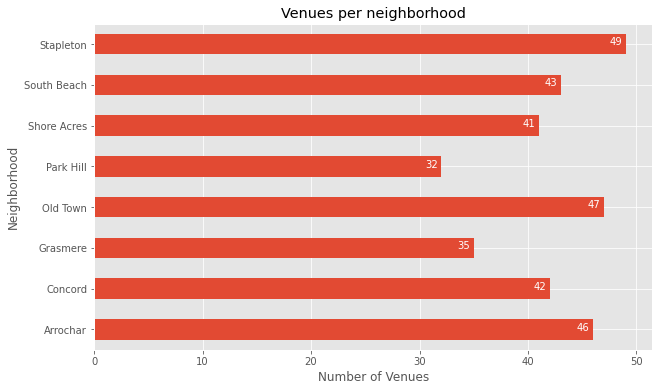

In [41]:
venue_per_neighbd = staten_venues.groupby(['Neighborhood'])['Venue Category'].count()
venue_per_neighbd.plot(kind='barh', figsize=(10, 6))

for idx, value in enumerate(venue_per_neighbd):
    plt.annotate(value, xy=(value - 1.5, idx - 0.02), color = 'white')
    
# add x-label to the plot
plt.xlabel('Number of Venues') 
# add title to the plot
plt.title('Venues per neighborhood') 

plt.show()

### Analyze each neighborhood

In [42]:
staten_one_hot = pd.get_dummies(staten_venues['Venue Category'], prefix='', prefix_sep='')
staten_one_hot["Neighborhood"] = staten_venues["Neighborhood"]

cols = list(staten_one_hot.columns)
cols = [cols[-1]] + cols[:-1]
staten_one_hot = staten_one_hot[cols]

print(staten_one_hot.shape)

staten_one_hot.head()

(335, 135)


,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Automotive Shop,...,Tanning Salon,Tattoo Parlor,Temple,Theme Park,Thrift / Vintage Store,Toll Plaza,Train Station,University,Vegetarian / Vegan Restaurant,Voting Booth
0,Stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Stapleton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Top 5 venues for each neighborhood by frequency

In [43]:
#### Determine catergory-wise mean grouping by Neighborhood
staten_grouped = staten_one_hot.groupby(['Neighborhood']).mean().reset_index()
staten_grouped

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Automotive Shop,...,Tanning Salon,Tattoo Parlor,Temple,Theme Park,Thrift / Vintage Store,Toll Plaza,Train Station,University,Vegetarian / Vegan Restaurant,Voting Booth
0,Arrochar,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
1,Concord,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.023810,0.000000,0.047619,...,0.02381,0.023810,0.000000,0.000000,0.047619,0.00000,0.023810,0.000000,0.02381,0.00000
2,Grasmere,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.028571,0.00000,0.00000
3,Old Town,0.000000,0.021277,0.000000,0.000000,0.000000,0.021277,0.000000,0.063830,0.042553,...,0.00000,0.000000,0.021277,0.000000,0.000000,0.00000,0.021277,0.000000,0.00000,0.00000
4,Park Hill,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,...,0.00000,0.000000,0.000000,0.000000,0.062500,0.03125,0.000000,0.000000,0.00000,0.00000
5,Shore Acres,0.000000,0.000000,0.024390,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.02439
6,South Beach,0.000000,0.000000,0.023256,0.023256,0.000000,0.000000,0.023256,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.023256,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000
7,Stapleton,0.020408,0.000000,0.000000,0.000000,0.020408,0.000000,0.000000,0.000000,0.020408,...,0.00000,0.020408,0.000000,0.000000,0.000000,0.00000,0.020408,0.000000,0.00000,0.00000


In [44]:
num_venues = 5

for neighbor in staten_grouped['Neighborhood']:
    print('\n----' + neighbor + '----')   
    temp_df = staten_grouped[staten_grouped['Neighborhood'] == neighbor].T.reset_index()
    temp_df.columns = ['venue','freq']
    temp_df = temp_df.iloc[1:]
    temp_df['freq'] = temp_df['freq'].astype(float)
    temp_df = temp_df.round({'freq': 2})
    temp_df.sort_values(by = 'freq', ascending = False, inplace = True)
    temp_df.reset_index(drop = True, inplace = True)
    print(temp_df[:num_venues])


----Arrochar----
           venue  freq
0  Deli / Bodega  0.07
1       Bus Stop  0.07
2     Bagel Shop  0.04
3   Liquor Store  0.04
4    Pizza Place  0.04

----Concord----
                    venue  freq
0          Medical Center  0.05
1     Martial Arts School  0.05
2  Thrift / Vintage Store  0.05
3         Automotive Shop  0.05
4                  Office  0.05

----Grasmere----
              venue  freq
0   Doctor's Office  0.11
1          Bus Stop  0.09
2              Bank  0.09
3  Dentist's Office  0.06
4            Office  0.06

----Old Town----
                venue  freq
0  Italian Restaurant  0.09
1      Medical Center  0.09
2     Auto Dealership  0.06
3              Bakery  0.06
4                Bank  0.06

----Park Hill----
                    venue  freq
0         Doctor's Office  0.19
1          Medical Center  0.06
2    Other Great Outdoors  0.06
3  Thrift / Vintage Store  0.06
4                  Office  0.06

----Shore Acres----
                venue  freq
0       Deli / 

### Segmenting and Clustering neighborhoods to pick the ones that are more similar to my neighborhood

In [45]:
# Function to sort and return most common venues
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [46]:
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
venues_sorted = pd.DataFrame(columns=columns)
venues_sorted['Neighborhood'] = staten_grouped['Neighborhood']

for ind in np.arange(staten_grouped.shape[0]):
    venues_sorted.iloc[ind, 1:] = return_most_common_venues(staten_grouped.iloc[ind, :], num_top_venues)

venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Arrochar,Deli / Bodega,Bus Stop,Bagel Shop,Beach,Italian Restaurant
1,Concord,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office
2,Grasmere,Doctor's Office,Bus Stop,Bank,Office,Dentist's Office
3,Old Town,Medical Center,Italian Restaurant,Auto Dealership,Bank,Bakery
4,Park Hill,Doctor's Office,Other Great Outdoors,Office,Thrift / Vintage Store,Medical Center
5,Shore Acres,Deli / Bodega,Dentist's Office,Chinese Restaurant,Building,Office
6,South Beach,Doctor's Office,Hospital,Pier,Beach,Dentist's Office
7,Stapleton,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place


#### Cluster neighborhoods

In [47]:
staten_grouped.head()

,Neighborhood,African Restaurant,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Assisted Living,Athletics & Sports,Auto Dealership,Automotive Shop,...,Tanning Salon,Tattoo Parlor,Temple,Theme Park,Thrift / Vintage Store,Toll Plaza,Train Station,University,Vegetarian / Vegan Restaurant,Voting Booth
0,Arrochar,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.000000,0.00000,0.0
1,Concord,0.0,0.000000,0.0,0.0,0.0,0.000000,0.02381,0.000000,0.047619,...,0.02381,0.02381,0.000000,0.0,0.047619,0.00000,0.023810,0.000000,0.02381,0.0
2,Grasmere,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.028571,0.000000,...,0.00000,0.00000,0.000000,0.0,0.000000,0.00000,0.000000,0.028571,0.00000,0.0
3,Old Town,0.0,0.021277,0.0,0.0,0.0,0.021277,0.00000,0.063830,0.042553,...,0.00000,0.00000,0.021277,0.0,0.000000,0.00000,0.021277,0.000000,0.00000,0.0
4,Park Hill,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.000000,0.031250,...,0.00000,0.00000,0.000000,0.0,0.062500,0.03125,0.000000,0.000000,0.00000,0.0


In [48]:
# set number of clusters
kclusters = 3

cluster_grouped = staten_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(cluster_grouped)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 1, 0, 1, 2, 1], dtype=int32)

In [49]:
# add clustering labels along with top ten venues 
venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
venues_sorted.head()

,Cluster Labels,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,1,Arrochar,Deli / Bodega,Bus Stop,Bagel Shop,Beach,Italian Restaurant
1,1,Concord,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office
2,1,Grasmere,Doctor's Office,Bus Stop,Bank,Office,Dentist's Office
3,1,Old Town,Medical Center,Italian Restaurant,Auto Dealership,Bank,Bakery
4,0,Park Hill,Doctor's Office,Other Great Outdoors,Office,Thrift / Vintage Store,Medical Center


In [50]:
staten_merged = staten_venues.copy()

# merge staten venues with venues sorted by neighborhood to add latitude/longitude for each neighborhood
staten_merged = staten_merged.join(venues_sorted.set_index('Neighborhood'), on='Neighborhood')

staten_merged.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place


#### Visualizing clusters of neighborhood

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(staten_merged['Neighborhood Latitude'], staten_merged['Neighborhood Longitude'], staten_merged['Neighborhood'], staten_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Examining Clusters

In [56]:
#Picking the necessary columns 
cols = staten_merged.columns.tolist()
cols = [cols[2]] + cols[5:staten_merged.shape[1]]

### Examining the cluster that my neighborhood falls in

In [57]:
staten_merged

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,Concord,40.604473,-74.084024,splendid hair salon & nails,Salon / Barbershop,grasmere,40.603428,-74.083466,1,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office
331,Concord,40.604473,-74.084024,Richmond Imaging,Building,2071,40.604876,-74.083043,1,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office
332,Concord,40.604473,-74.084024,Muscle Maker Grill,Sandwich Place,2071 Clove Road,40.604383,-74.083523,1,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office
333,Concord,40.604473,-74.084024,New Dorp Nails,Nail Salon,seguine ave,40.603480,-74.084380,1,Peruvian Restaurant,Martial Arts School,Office,Automotive Shop,Doctor's Office


In [58]:
staten_merged.loc[staten_merged['Cluster Labels'] == 1, :].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461,1,Salon / Barbershop,Bank,Pizza Place,Bus Line,Sandwich Place


### Filtering neighborhoods to match my neighborhood

In [59]:
towns_of_interest = staten_merged.loc[staten_merged['Cluster Labels'] == 1, 'Neighborhood'].unique()
towns_of_interest

array(['Stapleton', 'Arrochar', 'Grasmere', 'Old Town', 'Shore Acres',
       'Concord'], dtype=object)

In [60]:
#Filter on towns of interest
# towns_of_interest = ['Arrochar','Grasmere', 'Shore Acres', 'Stapleton', 'Concord', 
#                      'Old Town', 'Park Hill', 'South Beach']
target_towns = staten_venues.loc[staten_venues['Neighborhood'].isin(towns_of_interest), :]
target_towns.reset_index(drop = True, inplace = True)
print('The neighborhoods of interest are {} neighborhoods.\n'.format(len(target_towns['Neighborhood'].unique())))
print('The neighborhoods of interest are {}\n'.format(target_towns['Neighborhood'].unique()))

target_towns.head(8)

The neighborhoods of interest are 6 neighborhoods.

The neighborhoods of interest are ['Stapleton' 'Arrochar' 'Grasmere' 'Old Town' 'Shore Acres' 'Concord']



,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461
5,Stapleton,40.626928,-74.077902,Chase Bank,Bank,621 Bay St (Water St),40.626839,-74.075577
6,Stapleton,40.626928,-74.077902,SIUH Methadone Clinic,Medical Center,111 Water St (Bay Street),40.627198,-74.077796
7,Stapleton,40.626928,-74.077902,Subway,Sandwich Place,597 Bay St (Clifton Ave),40.627248,-74.075881


### Foursquare Recovery Index - Foot traffic 

In [61]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_a747a310db1840d194ae6986fbdfbc77 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='zD6jremOeJGHrMuXs11426W35Q-ChP8GLrsSJPaZ2RmS',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_a747a310db1840d194ae6986fbdfbc77.get_object(Bucket='courseracapstone-donotdelete-pr-c1hqethnxxsgr5',Key='Foursquare_Recovey_Index.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

    
#Extract top 20 categories from the Foursquare Recovery Index
# foot_traffic_df = pd.read_csv("Foursquare_Recovey_Index.csv", delimiter = ',')
foot_traffic_df = pd.read_csv(body)
foot_traffic_df.head()


,Date,Category_1,Category_2,Category_3,Category_4,Category_5,Category_6,Category_7,Category_8,Category_9,...,Category_11,Category_12,Category_13,Category_14,Category_15,Category_16,Category_17,Category_18,Category_19,Category_20
0,2/8/21,Beaches,Outdoors,Bank,Skiing,Metro,Medical,Auto Shops,Bars,Transit,...,School,"Liquor, Beer, and Wine Stores",Warehouse Store,Sports,Convenience Stores,Government,Hotels,Discount,Grocery,Bus
1,2/9/21,Beaches,Outdoors,Bank,Skiing,Metro,Medical,Auto Shops,Bars,Transit,...,School,"Liquor, Beer, and Wine Stores",Warehouse Store,Sports,Convenience Stores,Government,Hotels,Discount,Grocery,Bus
2,2/10/21,Beaches,Outdoors,Bank,Skiing,Metro,Medical,Auto Shops,Bars,Transit,...,School,"Liquor, Beer, and Wine Stores",Warehouse Store,Sports,Convenience Stores,Government,Hotels,Discount,Grocery,Bus
3,2/11/21,Beaches,Outdoors,Bank,Skiing,Metro,Medical,Auto Shops,Bars,Transit,...,School,"Liquor, Beer, and Wine Stores",Warehouse Store,Sports,Convenience Stores,Government,Hotels,Discount,Grocery,Bus
4,2/12/21,Airports,School,Bus,Pharmacies and Drug Stores,Transit,Metro,Apparel Retail,Office,Discount,...,Fitness,Big Box Store,Warehouse Store,Restaurant,Grocery,Bars,Home Stores and Services,Spiritual Centers,Salons and Services,Hotels


In [62]:
print("Number of unique categories in the Recovery Index: {}\n".format(len(np.unique(foot_traffic_df.iloc[:, 1:]))))
print("Unique categories in the Recovery Index:\n {}".format(np.unique(foot_traffic_df.iloc[:, 1:])))


Number of unique categories in the Recovery Index: 34

Unique categories in the Recovery Index:
 ['Airports' 'Apparel Retail' 'Auto DealerShips' 'Auto Shops' 'Bank' 'Bars'
 'Beaches' 'Big Box Store' 'Bus' 'Convenience Stores' 'Discount'
 'Fast Food' 'Fitness' 'Gas' 'Government' 'Grocery' 'Hardware'
 'Home Stores and Services' 'Hotels' 'Liquor, Beer, and Wine Stores'
 'Medical' 'Metro' 'Office' 'Outdoors' 'Pet Stores'
 'Pharmacies and Drug Stores' 'Restaurant' 'Salons and Services' 'School'
 'Skiing' 'Spiritual Centers' 'Sports' 'Transit' 'Warehouse Store']


In [63]:
traffic_df = foot_traffic_df.copy()
cols = ['FootTrafficDate']
foottraffic_rank_df = pd.DataFrame(columns = cols)
#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in foot_traffic_df.iterrows():
    foottraffic_rank_df.at[index, 'FootTrafficDate'] = row['Date']
    for idx in range(1,21):
        foottraffic_rank_df.at[index, row['Category_' + str(idx)]] = idx #(20 - idx) + 1

foottraffic_rank_df['FootTrafficDate'] = foottraffic_rank_df['FootTrafficDate'].astype('datetime64[ns]')

#Set the NaNs to 21 to indicate for categories with no rank
foottraffic_rank_df = foottraffic_rank_df.fillna(21)
foottraffic_rank_df.head()

,FootTrafficDate,Beaches,Outdoors,Bank,Skiing,Metro,Medical,Auto Shops,Bars,Transit,...,Big Box Store,Restaurant,Home Stores and Services,Spiritual Centers,Salons and Services,Pet Stores,Hardware,Fast Food,Auto DealerShips,Gas
0,2021-02-08,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
1,2021-02-09,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
2,2021-02-10,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
3,2021-02-11,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0,21.0
4,2021-02-12,21.0,21.0,21.0,21.0,6.0,10.0,21.0,16.0,5.0,...,12.0,14.0,17.0,18.0,19.0,21.0,21.0,21.0,21.0,21.0


In [64]:
num_venues = 20
print("")
print("--- Top 20 categories based on Foursquare Recovey Index ---")

fsr_rank_df = foottraffic_rank_df.mean(numeric_only = True).sort_values(ascending = True).reset_index()
fsr_rank_df.columns = ['Venue Category','Ranking']

fsr_rank_df[:num_venues]


--- Top 20 categories based on Foursquare Recovey Index ---


,Venue Category,Ranking
0,Airports,7.705882
1,Skiing,9.941176
2,Bars,10.000000
3,Apparel Retail,10.529412
4,Beaches,11.882353
5,Discount,12.294118
6,Hotels,12.882353
7,Bank,13.058824
8,Metro,13.529412
9,Medical,13.588235


### Fixing the Venue categories to match the Generic Foursquare Recovey Index categories

In [65]:
target_towns.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461


In [66]:
print("Number of unique categories in the neighborhoods of interest: {}\n".format(len(target_towns['Venue Category'].unique())))
print("Unique categories in the neighborhoods of interest:\n {}".format(target_towns['Venue Category'].unique()))

Number of unique categories in the neighborhoods of interest: 116

Unique categories in the neighborhoods of interest:
 ['Coffee Shop' 'Department Store' 'Building' 'Sandwich Place'
 'Discount Store' 'Bank' 'Medical Center' 'Library' 'Pizza Place'
 'Asian Restaurant' 'Diner' 'Miscellaneous Shop' 'Bus Stop' 'Park'
 'Government Building' 'Salon / Barbershop' 'Mobile Phone Shop' 'Bus Line'
 'Church' 'Restaurant' 'Mexican Restaurant' 'Rock Club' 'Train Station'
 'African Restaurant' 'Recording Studio' 'Seafood Restaurant'
 'Automotive Shop' 'Cocktail Bar' 'New American Restaurant'
 'Deli / Bodega' 'Tattoo Parlor' 'Cosmetics Shop' "Doctor's Office"
 'Dry Cleaner' 'Beach' 'Liquor Store' 'Middle Eastern Restaurant'
 'Sporting Goods Shop' 'Italian Restaurant' 'Social Club' 'Playground'
 'Outdoors & Recreation' 'Bagel Shop' 'Supermarket' 'Event Space'
 'Dance Studio' 'Polish Restaurant' 'Chinese Restaurant' 'Taco Place'
 'High School' 'Mediterranean Restaurant' 'Funeral Home' 'Nail Salon'
 'Ele

In [67]:
target_df = target_towns.copy()
target_df["Venue Category Orig"] = target_towns['Venue Category']
target_towns = target_df
target_towns.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Coffee Shop,117 Water St (at Wright St),40.627164,-74.077948,Coffee Shop
1,Stapleton,40.626928,-74.077902,Dollar General,Department Store,135 Canal St (Water Street),40.626935,-74.078271,Department Store
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Building,Stapleton Branch,40.626982,-74.076977,Building
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Sandwich Place,95 Water St (Canal Street),40.627202,-74.077257,Sandwich Place
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount Store,135 Canal St,40.627018,-74.078461,Discount Store


**Restaurants:**
Exploring restaurants, it is clear that the venues are by cuisine. 

In [68]:
target_towns.loc[target_towns['Venue Category'].str.contains('Restaurant'), :].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
11,Stapleton,40.626928,-74.077902,Bay House Bistro,Asian Restaurant,574 Bay St,40.627827,-74.076244,Asian Restaurant
23,Stapleton,40.626928,-74.077902,Vida,Restaurant,381 Van Duzer St (at Beach St),40.628723,-74.079802,Restaurant
24,Stapleton,40.626928,-74.077902,El Patron Restaurant & Lounge Inc.,Mexican Restaurant,520 Bay St (Sands St.),40.629154,-74.076541,Mexican Restaurant
31,Stapleton,40.626928,-74.077902,Wazobia Restaurant,African Restaurant,611 Bay St,40.627101,-74.075808,African Restaurant
35,Stapleton,40.626928,-74.077902,Taverna on the Bay,Seafood Restaurant,661 Bay St (Thompson),40.625907,-74.075017,Seafood Restaurant


We are only interested in generic venue category and not cuisines, so we clean up by setting venue categories as Restaurants

In [69]:
#Cleaning up Restaurant venue category
target_towns.loc[target_towns['Venue Category'].str.contains('Restaurant'), 'Venue Category'] = 'Restaurant'
target_towns.loc[target_towns['Venue Category'].str.contains('Restaurant'), :].head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
11,Stapleton,40.626928,-74.077902,Bay House Bistro,Restaurant,574 Bay St,40.627827,-74.076244,Asian Restaurant
23,Stapleton,40.626928,-74.077902,Vida,Restaurant,381 Van Duzer St (at Beach St),40.628723,-74.079802,Restaurant
24,Stapleton,40.626928,-74.077902,El Patron Restaurant & Lounge Inc.,Restaurant,520 Bay St (Sands St.),40.629154,-74.076541,Mexican Restaurant
31,Stapleton,40.626928,-74.077902,Wazobia Restaurant,Restaurant,611 Bay St,40.627101,-74.075808,African Restaurant
35,Stapleton,40.626928,-74.077902,Taverna on the Bay,Restaurant,661 Bay St (Thompson),40.625907,-74.075017,Seafood Restaurant


**Sports venues:**
Looking for venues that are Sports related

In [70]:
target_towns.loc[target_towns['Venue Category'].isin(['Sporting Goods Shop', 'Athletics & Sports']), :]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
60,Arrochar,40.596313,-74.067124,Treshers,Sporting Goods Shop,186 Robin Rd (Sand Lane),40.592519,-74.067604,Sporting Goods Shop
231,Concord,40.604473,-74.084024,intoxx fitness,Athletics & Sports,2071 Clove Road,40.605323,-74.082881,Athletics & Sports


The above rows can be grouped under the Sports category

In [71]:
#Cleaning up Sports venue category
target_towns.loc[target_towns['Venue Category'].isin(['Sporting Goods Shop', 'Athletics & Sports']),
                                                        'Venue Category'] = 'Sports'
target_towns.loc[target_towns['Venue Category Orig'].isin(['Sporting Goods Shop', 'Athletics & Sports']),:]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
60,Arrochar,40.596313,-74.067124,Treshers,Sports,186 Robin Rd (Sand Lane),40.592519,-74.067604,Sporting Goods Shop
231,Concord,40.604473,-74.084024,intoxx fitness,Sports,2071 Clove Road,40.605323,-74.082881,Athletics & Sports


**Spiritual Centers:**
Looking for venues that are Spiritual Centers

In [72]:
#Cleaning up Spiritual Centers venue category
target_towns.loc[target_towns['Venue Category'].isin(['Church', 'Synagogue', 'Spiritual Center', 'Temple']),
                                                        'Venue Category'] = 'Spiritual Centers'
target_towns.loc[target_towns['Venue Category Orig'].isin(['Church', 'Synagogue', 'Spiritual Center', 'Temple' ]),:]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
22,Stapleton,40.626928,-74.077902,First Central Baptist Church,Spiritual Centers,117 Wright St,40.628233,-74.079737,Church
28,Stapleton,40.626928,-74.077902,ICC North,Spiritual Centers,70 Beach St,40.627993,-74.078527,Church
136,Old Town,40.596329,-74.087511,Cell 44,Spiritual Centers,10 Dumont Ave,40.594888,-74.088029,Temple
199,Shore Acres,40.609719,-74.066678,Staten Island Mar Thoma Church,Spiritual Centers,Faber St,40.611977,-74.068203,Church


**Outdoor venues:**
Looking for venues that are outdoors and consolidating the category as Outdoors

In [73]:
#Cleaning up Outdoors venue category
target_towns.loc[target_towns['Venue Category'].isin(['Park', 'Playground', 'Outdoors & Recreation',
                                                        'Sculpture Garden', 'Rest Area', 'Lake', 
                                                        'Dog Run', 'Other Great Outdoors', 'Scenic Lookout',
                                                       'Performing Arts Venue', 'Art Gallery' , 'Concert Hall']),
                                                        'Venue Category'] = 'Outdoors'

target_towns.loc[target_towns['Venue Category'].str.contains('Outdoors'), :].head()                                                        

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
15,Stapleton,40.626928,-74.077902,Tappen Park,Outdoors,Bay St (btwn Water & Canal St),40.626872,-74.076857,Park
64,Arrochar,40.596313,-74.067124,Swing Life Away Swings,Outdoors,71 Sand Ln,40.597928,-74.070138,Playground
66,Arrochar,40.596313,-74.067124,Gateway National Recreation Area,Outdoors,"Staten Island, NY 10305",40.592428,-74.065373,Outdoors & Recreation
89,Arrochar,40.596313,-74.067124,The monument,Outdoors,115 lily pond ave,40.600412,-74.064524,Sculpture Garden
180,Shore Acres,40.609719,-74.066678,Poolside At The Dawson's,Outdoors,New York,40.610948,-74.066410,Art Gallery


**Bus:** Consolidating the category, Bus

In [74]:
#Cleaning up Bus venue category
target_towns.loc[target_towns['Venue Category'].isin(['Bus Stop', 'Bus Station', 'Bus Line']),
                                                        'Venue Category'] = 'Bus'

target_towns.loc[target_towns['Venue Category Orig'].isin(['Bus Stop', 'Bus Station', 'Bus Line']), :].head()                                                        

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
14,Stapleton,40.626928,-74.077902,MTA Bus - Bay St & Water St (S51/S76),Bus,Bay St (at Water St),40.627117,-74.075865,Bus Stop
20,Stapleton,40.626928,-74.077902,Bay&Water Street S51/76 Bus Stop,Bus,"Staten Island, NY 10304",40.627308,-74.076182,Bus Line
25,Stapleton,40.626928,-74.077902,MTA Bus - Van Duzer St & Beach St (S74/S78),Bus,Van Duzer St (btwn Prospect & Beach St),40.628890,-74.079565,Bus Stop
26,Stapleton,40.626928,-74.077902,S52,Bus,New York,40.627231,-74.078499,Bus Line
49,Arrochar,40.596313,-74.067124,MTA Bus - S53,Bus,"Staten Island, NY",40.598965,-74.063835,Bus Line


**Category : Bars and Liquor, Beer, and Wine Stores**

In [75]:
#Cleaning up Bars category
target_towns.loc[target_towns['Venue Category'].isin(['Cocktail Bar', 'Gastropub', 'Bar', 'Nightlife Spot',
                                                        'Other Nightlife']),
                                                        'Venue Category'] = 'Bars'

#Cleaning up Liquor, Beer, and Wine Stores  category
target_towns.loc[target_towns['Venue Category'].isin(['Liquor Store']),
                                                        'Venue Category'] = 'Liquor, Beer, and Wine Stores'

target_towns.loc[target_towns['Venue Category Orig'].isin(['Cocktail Bar', 'Gastropub', 'Bar', 
                                                           'Nightlife Spot','Liquor Store']), :]


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
38,Stapleton,40.626928,-74.077902,The Coupe,Bars,379 Van Duzer St (Beach Street),40.628754,-74.079730,Cocktail Bar
56,Arrochar,40.596313,-74.067124,Arrochar,"Liquor, Beer, and Wine Stores",103 McClean Ave,40.594412,-74.068013,Liquor Store
70,Arrochar,40.596313,-74.067124,South Beach Wines And Liquors,"Liquor, Beer, and Wine Stores",325 Sand Ln (at Quincy Ave),40.592030,-74.067654,Liquor Store
144,Old Town,40.596329,-74.087511,Jimmy's Liquors,"Liquor, Beer, and Wine Stores",1391 Hylan Blvd (Reid Ave),40.594710,-74.086773,Liquor Store
192,Shore Acres,40.609719,-74.066678,Danny Blaines,Bars,1384 Bay St,40.609820,-74.063232,Bar
194,Shore Acres,40.609719,-74.066678,The Phunky Elephant Gastropub,Bars,1271 Bay St (Scarboro Ave),40.612489,-74.064894,Gastropub


Similary, cleaning up the rest of the categories to reflect the generic ones in the Foursquare recovery index

In [78]:
#Cleaning up Salons and Services category
target_towns.loc[target_towns['Venue Category'].isin(['Salon / Barbershop', 'Spa', 'Nail Salon', 'Health & Beauty Service',
                                                       'Tanning Salon', ]),
                                                        'Venue Category'] = 'Salons and Services'

#Cleaning up Restaurant category
target_towns.loc[target_towns['Venue Category'].isin(['Diner', 'Steakhouse']),
                                                        'Venue Category'] = 'Restaurant'

#Cleaning up Office category
target_towns.loc[target_towns['Venue Category'].isin(['Building', 'Recording Studio', 'Rock Club', 'Non-Profit',
                                                       'Office', "Doctor's Office", "Dentist's Office",
                                                       'Professional & Other Places', 'Conference Room',
                                                       'Financial or Legal Service', 'Coworking Space']),
                                                        'Venue Category'] = 'Office'

#Cleaning up Fast Food category
target_towns.loc[target_towns['Venue Category'].isin(['Coffee Shop', 'Sandwich Place', 'Pizza Place',
                                                        'Deli / Bodega', 'Taco Place', 'Bagel Shop',
                                                        'Ice Cream Shop', 'Food & Drink Shop', 'Food',
                                                        'Café', 'Bakery', 'Breakfast Spot', 'Donut Shop',
                                                        'Fried Chicken Joint']),
                                                        'Venue Category'] = 'Fast Food'

#Cleaning up Bank category
target_towns.loc[target_towns['Venue Category'].isin(['Check Cashing Service', 'Bank']),
                                                        'Venue Category'] = 'Bank'


#Cleaning up Home Stores and Services category
target_towns.loc[target_towns['Venue Category'].isin(['Dry Cleaner', 'Tattoo Parlor', 'Dance Studio', 'Jewelry Store',
                                                      'Pawn Shop', 'Social Club', 'Laundry Service', 'Music Store',
                                                      'Gym', 'Library', 'Music Venue', 'Bike Shop', 'Funeral Home', 'Event Space',
                                                      'Assisted Living','Optical Shop', 'Flower Shop', 
                                                      'Design Studio', 'Pilates Studio',
                                                        'Furniture / Home Store', 'General Entertainment', 'Print Shop']),
                                                        'Venue Category'] = 'Home Stores and Services'

#Cleaning up School category
target_towns.loc[target_towns['Venue Category'].isin(['High School', 'University', 'Elementary School',
                                                       'Nursery School', 'Martial Arts School', 'Daycare']),
                                                        'Venue Category'] = 'School'

#Cleaning up Government category
target_towns.loc[target_towns['Venue Category'].isin(['Government Building', 'Courthouse', 'Voting Booth', 'Post Office']),
                                                        'Venue Category'] = 'Government'

#Cleaning up Medical category
target_towns.loc[target_towns['Venue Category'].isin(['Medical Center', 'Medical Lab', 'Hospital', 'Physical Therapist']),
                                                        'Venue Category'] = 'Medical'

#Cleaning up Pharmacies and Drug Stores category
target_towns.loc[target_towns['Venue Category'].isin(['Pharmacy']),
                                                        'Venue Category'] = 'Pharmacies and Drug Stores'

#Cleaning up Discount category
target_towns.loc[target_towns['Venue Category'].isin(['Discount Store']),
                                                        'Venue Category'] = 'Discount'

#Cleaning up Apparel Retail category
target_towns.loc[target_towns['Venue Category'].isin(['Department Store', 'Boutique', "Women's Store"]),
                                                        'Venue Category'] = 'Apparel Retail'

#Cleaning up Fitness category
target_towns.loc[target_towns['Venue Category'].isin(['Gym / Fitness Center']),
                                                        'Venue Category'] = 'Fitness'

#Cleaning up Grocery category
target_towns.loc[target_towns['Venue Category'].isin(['Grocery Store', 'Supermarket']),
                                                       'Venue Category'] = 'Grocery'

#Cleaning up Transit category
target_towns.loc[target_towns['Venue Category'].isin(['Train Station']),
                                                       'Venue Category'] = 'Transit'

#Cleaning up Auto DealerShips category
target_towns.loc[target_towns['Venue Category'].isin(['Auto Dealership']),
                                                       'Venue Category'] = 'Auto DealerShips'

#Cleaning up Auto Shops category
target_towns.loc[target_towns['Venue Category'].isin(['Automotive Shop', 'Gas Station']),
                                                       'Venue Category'] = 'Auto Shops'

#Cleaning up Hardware category
target_towns.loc[target_towns['Venue Category'].isin(['Hardware Store']),
                                                       'Venue Category'] = 'Hardware'

#Cleaning up Convenience Stores category
target_towns.loc[target_towns['Venue Category'].isin(['Mobile Phone Shop', 'Miscellaneous Shop',
                                                        'Cosmetics Shop', 'Thrift / Vintage Store']),
                                                        'Venue Category'] = 'Convenience Stores'

#Cleaning up Pet Stores category
target_towns.loc[target_towns['Venue Category'].isin(['Pet Service']),
                                                        'Venue Category'] = 'Pet Stores'



In [79]:
print("Number of unique categories in the neighborhoods of interest: {}\n".format(len(target_towns['Venue Category'].unique())))
print("Unique categories in the neighborhoods of interest:\n {}".format(target_towns['Venue Category'].unique()))


Number of unique categories in the neighborhoods of interest: 26

Unique categories in the neighborhoods of interest:
 ['Fast Food' 'Apparel Retail' 'Office' 'Discount' 'Bank' 'Medical'
 'Home Stores and Services' 'Restaurant' 'Convenience Stores' 'Bus'
 'Outdoors' 'Government' 'Salons and Services' 'Spiritual Centers'
 'Transit' 'Auto Shops' 'Bars' 'Beach' 'Liquor, Beer, and Wine Stores'
 'Sports' 'Grocery' 'School' 'Auto DealerShips'
 'Pharmacies and Drug Stores' 'Hardware' 'Fitness']


## Top 10 locations to set up Girl Scouts Cookie Booth locations

In [80]:
# Foursquare Recovery Index
fsr_rank_df

,Venue Category,Ranking
0,Airports,7.705882
1,Skiing,9.941176
2,Bars,10.000000
3,Apparel Retail,10.529412
4,Beaches,11.882353
5,Discount,12.294118
6,Hotels,12.882353
7,Bank,13.058824
8,Metro,13.529412
9,Medical,13.588235


In [81]:
print(target_towns.shape)
target_towns.head()

(260, 9)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig
0,Stapleton,40.626928,-74.077902,Best Coffee Shop,Fast Food,117 Water St (at Wright St),40.627164,-74.077948,Coffee Shop
1,Stapleton,40.626928,-74.077902,Dollar General,Apparel Retail,135 Canal St (Water Street),40.626935,-74.078271,Department Store
2,Stapleton,40.626928,-74.077902,Sovereign Bank,Office,Stapleton Branch,40.626982,-74.076977,Building
3,Stapleton,40.626928,-74.077902,Defonte's Sandwich Shop,Fast Food,95 Water St (Canal Street),40.627202,-74.077257,Sandwich Place
4,Stapleton,40.626928,-74.077902,Family Dollar,Discount,135 Canal St,40.627018,-74.078461,Discount Store


#### Sort by Foursquare Recovery Index - Foot Traffic

In [82]:
ranked_venues = target_towns.merge(fsr_rank_df, on = 'Venue Category')
ranked_venues.sort_values(by = ['Ranking'], ascending = True, inplace = True)

In [83]:
ranked_venues[['Venue', 'Venue Category', 'Venue Address', 'Venue Latitude', 'Venue Longitude', 'Ranking']].head(8)

,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Ranking
229,The Coupe,Bars,379 Van Duzer St (Beach Street),40.628754,-74.079730,10.000000
231,The Phunky Elephant Gastropub,Bars,1271 Bay St (Scarboro Ave),40.612489,-74.064894,10.000000
232,Island Chatau,Bars,900 W Fingerboard Rd,40.601069,-74.085779,10.000000
230,Danny Blaines,Bars,1384 Bay St,40.609820,-74.063232,10.000000
39,Apple Department Store,Apparel Retail,112 Canal St (Wright Street),40.626328,-74.077391,10.529412
38,Dollar General,Apparel Retail,135 Canal St (Water Street),40.626935,-74.078271,10.529412
76,Family Dollar,Discount,135 Canal St,40.627018,-74.078461,12.294118
77,Family Dollar,Discount,40 Prospect St (Prospect Street),40.628318,-74.075875,12.294118


As Bars were kept in the dataset just out of interest, it is obvious that the bars is not a place to put up a Girl Scouts Booth so removing the Bars from the dataset. Similary, some of the more obvious categories will be removed from the list.

In [84]:
ranked_venues = ranked_venues[~ranked_venues.loc[:, 'Venue Category'].isin(['Bars', 'Medical', 'Bank'])].reset_index(drop=True)

In [85]:
top10_venues = ranked_venues[:10]
top10_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Address,Venue Latitude,Venue Longitude,Venue Category Orig,Ranking
0,Stapleton,40.626928,-74.077902,Apple Department Store,Apparel Retail,112 Canal St (Wright Street),40.626328,-74.077391,Department Store,10.529412
1,Stapleton,40.626928,-74.077902,Dollar General,Apparel Retail,135 Canal St (Water Street),40.626935,-74.078271,Department Store,10.529412
2,Stapleton,40.626928,-74.077902,Family Dollar,Discount,135 Canal St,40.627018,-74.078461,Discount Store,12.294118
3,Stapleton,40.626928,-74.077902,Family Dollar,Discount,40 Prospect St (Prospect Street),40.628318,-74.075875,Discount Store,12.294118
4,Concord,40.604473,-74.084024,2098 clove rd.,School,"2098 Clove Rd, Concord, NY 10305",40.603340,-74.083298,Martial Arts School,13.588235
5,Concord,40.604473,-74.084024,Longview Academy Extreme MMA,School,"2098 Clove Rd, Concord, NY 10305",40.603362,-74.083442,Martial Arts School,13.588235
6,Old Town,40.596329,-74.087511,Academy Of St. Dorothy,School,1305 Hylan Blvd,40.597556,-74.086168,School,13.588235
7,Grasmere,40.598268,-74.076674,Elite Daycare,School,"Staten Island, NY 10305",40.597788,-74.080581,Nursery School,13.588235
8,Grasmere,40.598268,-74.076674,Saint Joseph Hill,School,"850 Hylan Blvd, Staten Island, NY 10305",40.598146,-74.070645,University,13.588235
9,Arrochar,40.596313,-74.067124,P.S. 39 Francis J. Murphy Jr.,School,71 Sand Ln (btwn Major & MacFarland Ave),40.597828,-74.071243,Elementary School,13.588235


In [87]:
# create map of Grasmere, Staten Island using latitude and longitude values
map_top10 = folium.Map(location=[latitude, longitude], zoom_start=14)

# add markers to map
for lat, lng, category, name in zip(top10_venues['Venue Latitude'], 
                                           top10_venues['Venue Longitude'], 
                                           top10_venues['Venue Category'], 
                                           top10_venues['Venue']):
    label = '{} - {}'.format(category, name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_top10)  
    
map_top10

#### The above are the top 10 locations to put up a Girl Scouts Cookie Booth.